In [2]:
import pandas as pd
import numpy as np

In [4]:
happ = pd.read_csv("C:\\Users\\HP\\Desktop\\DT\\dataset\\happiness_score_dataset.csv")

In [5]:
happ.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [6]:
happ.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
happ.info

<bound method DataFrame.info of                       Country                           Region  \
0                 Switzerland                   Western Europe   
1                     Iceland                   Western Europe   
2                     Denmark                   Western Europe   
3                      Norway                   Western Europe   
4                      Canada                    North America   
5                     Finland                   Western Europe   
6                 Netherlands                   Western Europe   
7                      Sweden                   Western Europe   
8                 New Zealand        Australia and New Zealand   
9                   Australia        Australia and New Zealand   
10                     Israel  Middle East and Northern Africa   
11                 Costa Rica      Latin America and Caribbean   
12                    Austria                   Western Europe   
13                     Mexico      Latin Ame

In [8]:
print("Our data has {} rows (observations/countries) and {} columns.".format(happ.shape[0], happ.shape[1]))

Our data has 158 rows (observations/countries) and 12 columns.


In [9]:
# Check for any missing values in the data
happ.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [11]:
happ['Rank'] = range(1, 159)

In [14]:
quartile_index = np.percentile(happ['Rank'], [25, 50, 75])
quartiles = pd.Series(happ['Rank'].map(lambda x:(np.searchsorted(quartile_index, x) + 1)), name = 'Quartile')
happ = pd.concat([happ, quartiles], axis = 1)   

In [16]:
# Check our updated data with the new 'Rank' and 'Quartile' columns
happ.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Rank,Quartile
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1,1
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2,1
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,3,1
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,4,1
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,5,1


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Set font sizes for all of our plots
plt.rc('font', size = 14)
plt.rc('axes', labelsize = 16)
plt.rc('legend', fontsize = 18)
plt.rc('axes', titlesize = 24)
plt.rc('figure', titlesize = 24)

In [20]:
# Set style
plt.style.use('seaborn-whitegrid')

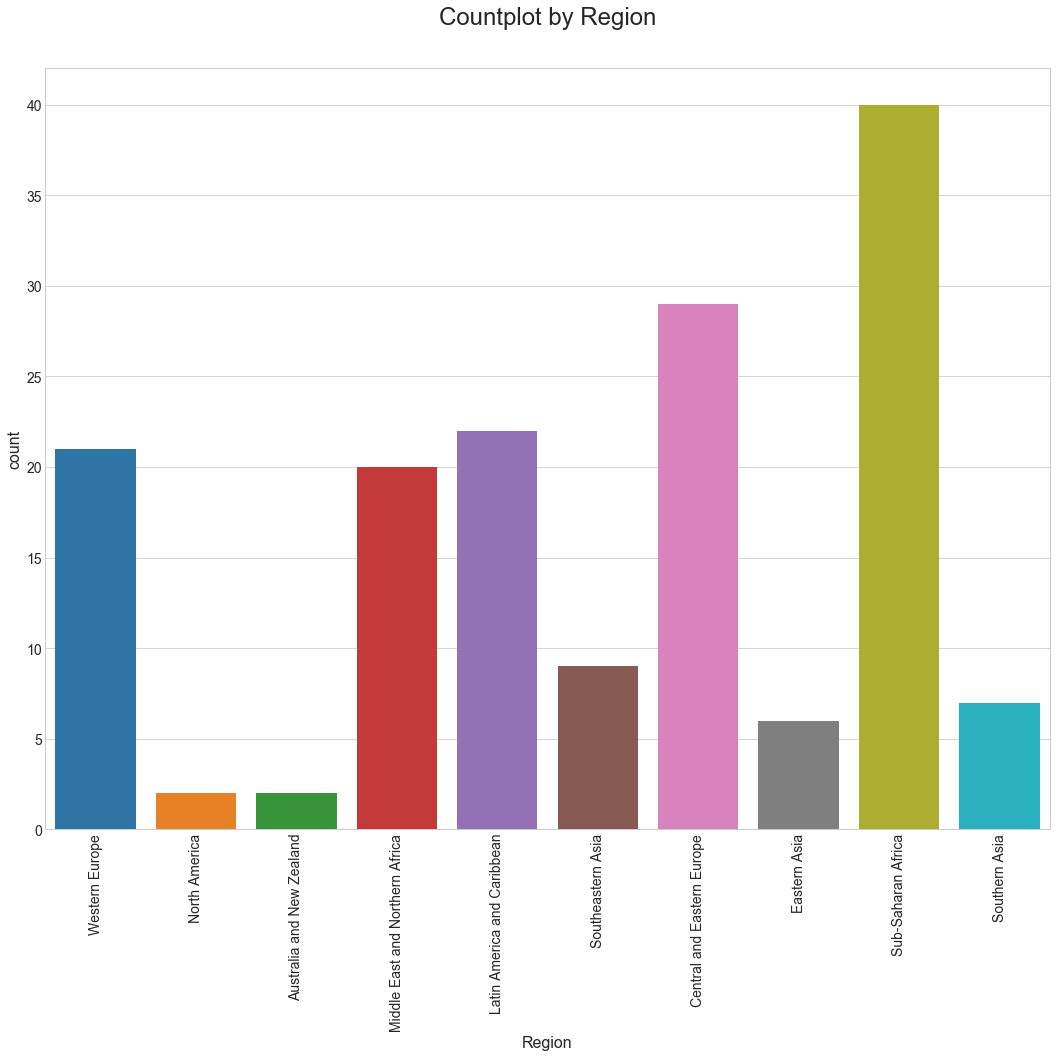

In [21]:
fig = plt.figure(figsize = (18, 14))
ax = plt.axes()

countplot = sns.countplot('Region', data = happ, saturation = 0.8, palette = 'tab10')
countplot.set_xticklabels(countplot.get_xticklabels(), rotation = 90)
countplot.set_title("Countplot by Region", y = 1.05);

TypeError: __init__() got an unexpected keyword argument 'title_fontsize'

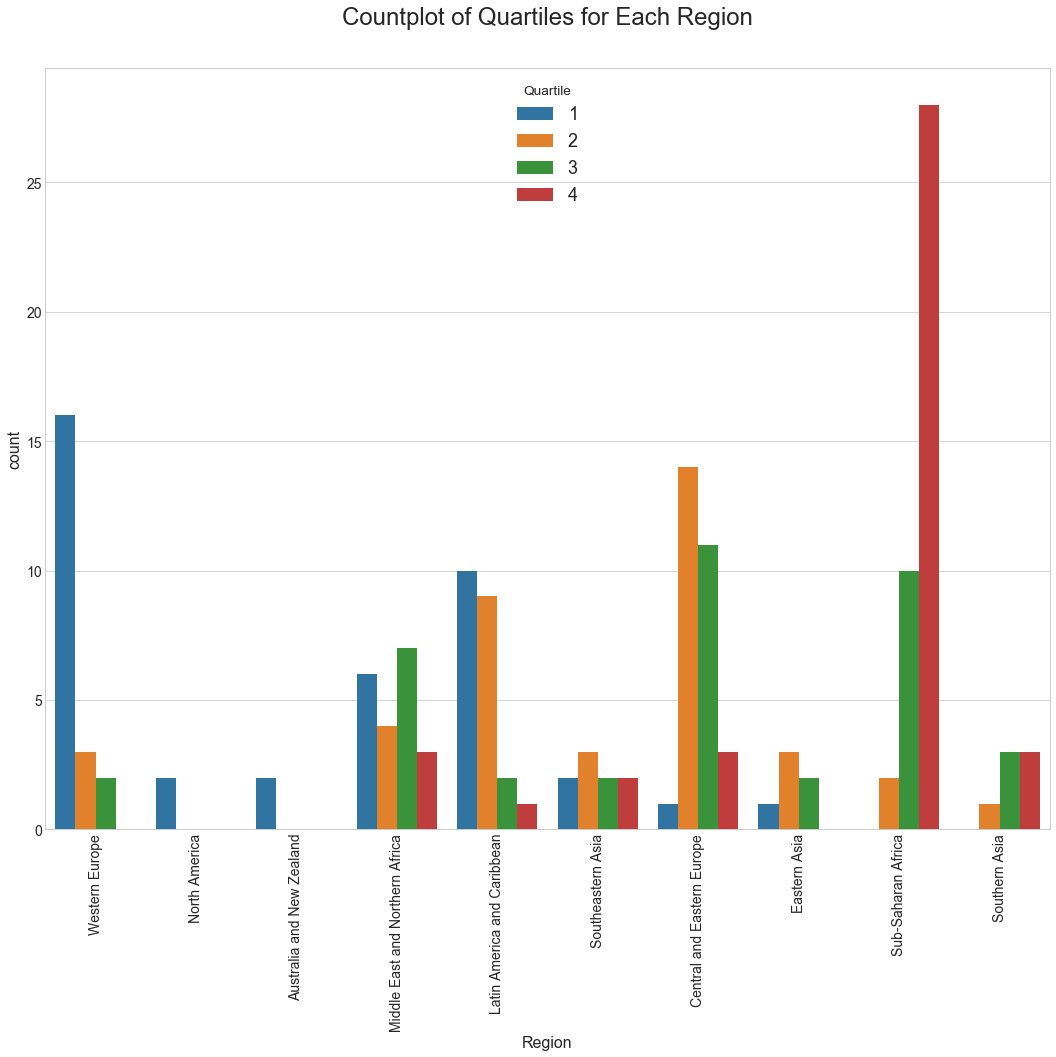

In [22]:
fig = plt.figure(figsize = (18, 14))
ax = plt.axes()

stacked_countplot = sns.countplot('Region', data = happ, hue = 'Quartile')
stacked_countplot.set_xticklabels(countplot.get_xticklabels(), rotation = 90)
stacked_countplot.set_title("Countplot of Quartiles for Each Region", y = 1.05);
ax.legend(loc = "upper left", title = 'Quartile', title_fontsize = 18);

In [23]:
print("Table of Average Rank for Each Region:\n")
print(happ.groupby('Region')['Rank'].agg('mean'))

Table of Average Rank for Each Region:

Region
Australia and New Zealand            9.500000
Central and Eastern Europe          79.034483
Eastern Asia                        64.500000
Latin America and Caribbean         46.909091
Middle East and Northern Africa     77.600000
North America                       10.000000
Southeastern Asia                   81.222222
Southern Asia                      113.142857
Sub-Saharan Africa                 127.900000
Western Europe                      29.523810
Name: Rank, dtype: float64


In [27]:
df = pd.concat([happ['Happiness Score'], happ[feature_cols]], axis = 1)

fig = plt.figure(figsize = (13, 10))
plt.style.use('seaborn-white')

plt.matshow(df.corr(), fignum = fig.number, cmap = 'viridis')
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

plt.title('Correlation Matrix', fontsize = 24, y = 1.2);

KeyError: "['Economy(GDP per Capita)' 'Health(Life Expectancy)'\n 'Trust(Government Corruption)' 'Corruption'] not in index"

In [31]:
col_names_dict = { 'happiness score': 'happiness',
                   'Economy (GDP per capita)':'economy',
                  'Social support':'Social Support', 'Health (Life Expectancy)':'Life Expectancy',
                   'Trust (Government Corruption)': 'Corruption'}

happ.rename(columns = col_names_dict, inplace = True)

In [28]:
happ.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Rank                             0
Quartile                         0
dtype: int64

In [38]:
feature_cols = ['Life Expectancy', 'Freedom', 'Corruption','Generosity']

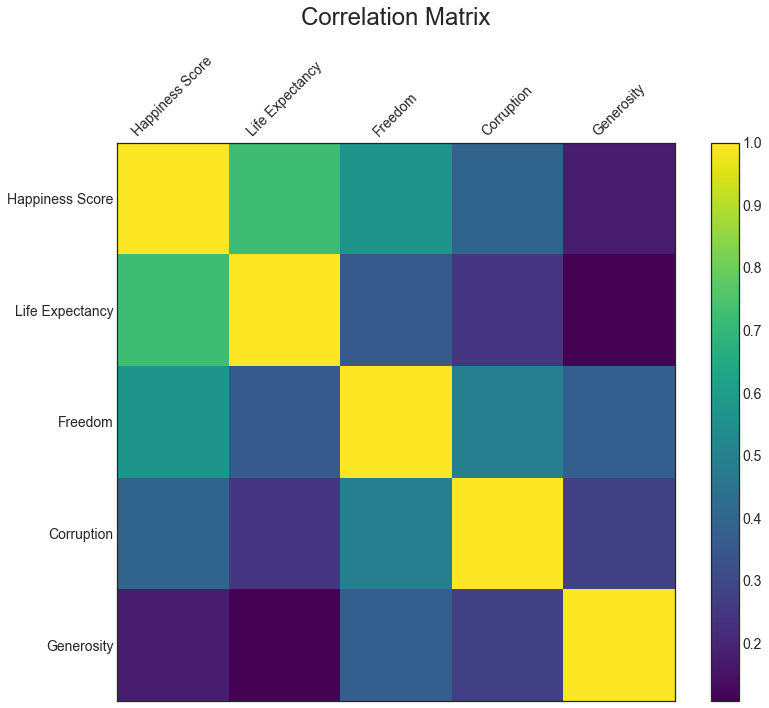

In [39]:
df = pd.concat([happ['Happiness Score'], happ[feature_cols]], axis = 1)

fig = plt.figure(figsize = (13, 10))
plt.style.use('seaborn-white')

plt.matshow(df.corr(), fignum = fig.number, cmap = 'viridis')
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

plt.title('Correlation Matrix', fontsize = 24, y = 1.2);

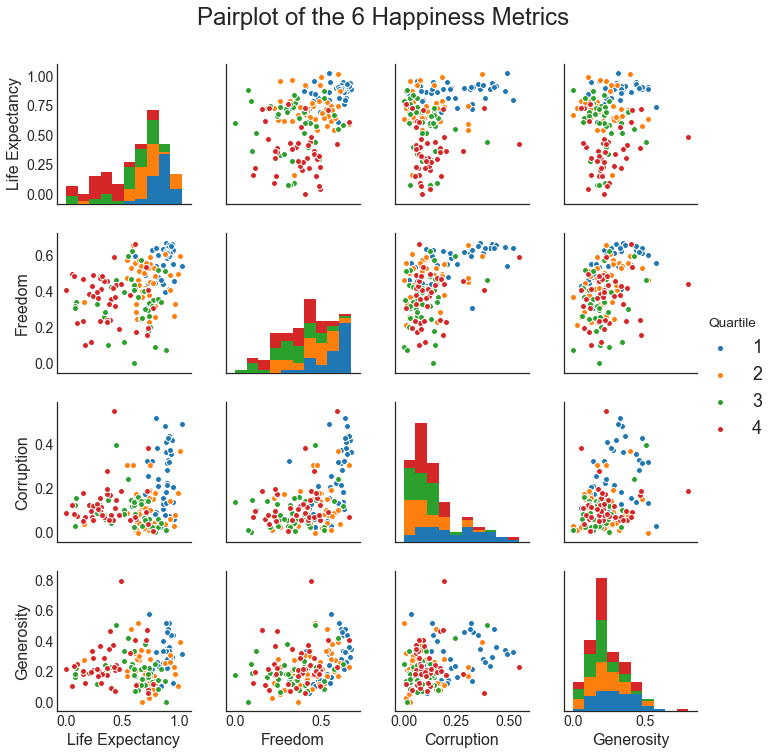

In [41]:
pairplot = sns.pairplot(happ, hue = 'Quartile', vars = feature_cols)
pairplot.fig.suptitle("Pairplot of the 6 Happiness Metrics", fontsize = 24, y = 1.05);

In [42]:
#What about the relationship between the overall score/rank and each of the factors? For instance, does the Life Expectancy generally increase as we progress up the rankings toward happier countries?

IndexError: list index out of range

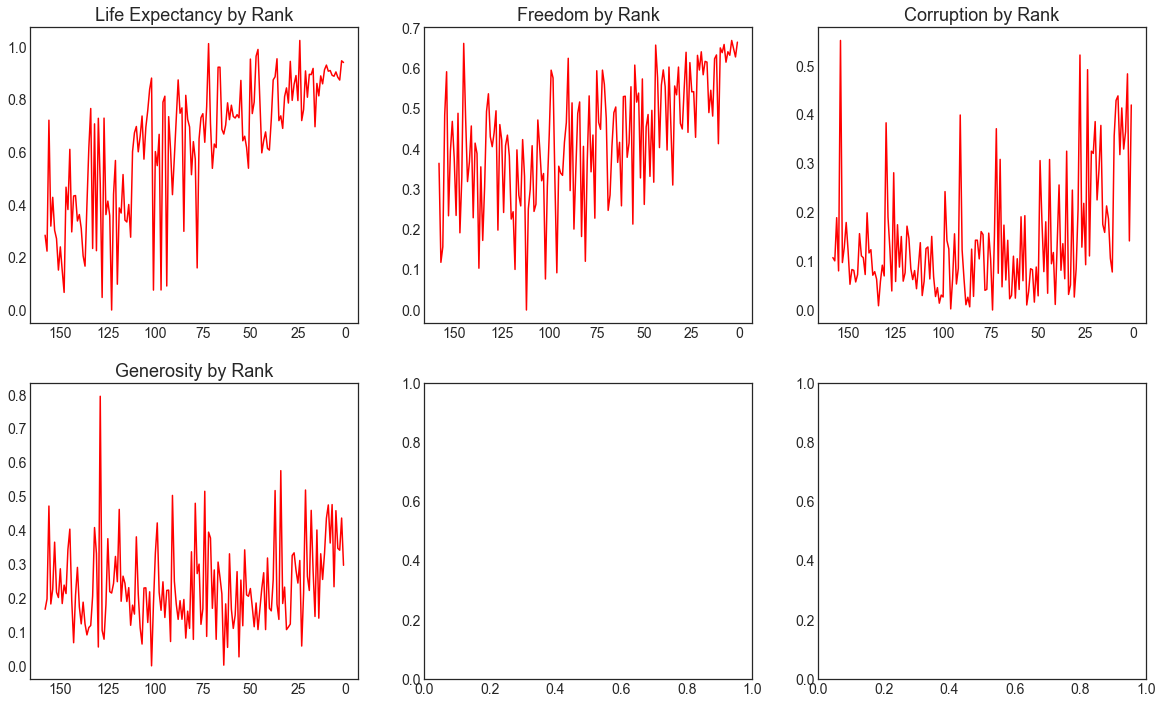

In [45]:
fig, axes = plt.subplots(2, 3, figsize = (20, 12))

for i, ax in enumerate(axes.flat):
    ax.plot(happ['Rank'], happ[feature_cols[i]], color = 'red')
    ax.set_title(feature_cols[i] + ' by Rank', fontsize = 18)
    ax.set_xlim(153, 1)
    ax.axis('tight')

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [47]:
#Linear Regression

In [48]:
y = happ['Happiness Score']
X = happ[feature_cols]

In [49]:
# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [51]:
# Fit a linear regression model to the data
lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
# Use the fitted model to make predictions
preds = lin_reg_model.predict(X_test)

In [53]:
# Find the average error of our predictions for the validation data
mean_squared_error(preds, y_test)    

0.5229591399652721

In [54]:
# Another metric for evaluating error
mean_absolute_error(preds, y_test)  

0.5981044262450583